In [1]:
import time
import sys
sys.path.append('../')
from pinn_magnetic_experimental import MultiPoleModel
import smtf_utility as util


TensorFlow version: 2.15.0


In [2]:
sim = util.bf_simulator([1, 1.33, 1.66, 1.99], 30, scale=1e9)
sim.add_dipole(0.5, 0,0,1,0,0)
sim.add_dipole(0,0.25,0,0,2,0)
sim.add_dipole(0,0,.15,0,0,3)

positions, values = sim.get_data()
positions, values = util.shuffle_data(positions, values)

In [3]:
model = MultiPoleModel(moments=3, lrate=0.9, optimizer='adadelta', loss='huber', scale=1e9, early_stop=False, target_stop=1)
test_epochs = 2000

In [4]:
start = time.time()
model.fit(positions, values, epochs=test_epochs)
end = time.time()

epoch  0 --- Loss --- 122.441315
epoch  1 --- Loss --- 117.513054
epoch  2 --- Loss --- 112.717964
epoch  3 --- Loss --- 108.00043
epoch  4 --- Loss --- 103.33764
epoch  5 --- Loss --- 98.763985
epoch  6 --- Loss --- 94.30229
epoch  7 --- Loss --- 89.95146
epoch  8 --- Loss --- 86.020325
epoch  9 --- Loss --- 82.20635
epoch  10 --- Loss --- 78.414894
epoch  11 --- Loss --- 74.65718
epoch  12 --- Loss --- 70.949844
epoch  13 --- Loss --- 67.26403
epoch  14 --- Loss --- 63.60795
epoch  15 --- Loss --- 59.991486
epoch  16 --- Loss --- 56.49426
epoch  17 --- Loss --- 53.30078
epoch  18 --- Loss --- 50.183838
epoch  19 --- Loss --- 47.169125
epoch  20 --- Loss --- 44.569237
epoch  21 --- Loss --- 42.11474
epoch  22 --- Loss --- 40.034714
epoch  23 --- Loss --- 38.163982
epoch  24 --- Loss --- 36.431625
epoch  25 --- Loss --- 35.02401
epoch  26 --- Loss --- 33.94034
epoch  27 --- Loss --- 33.165546
epoch  28 --- Loss --- 32.52512
epoch  29 --- Loss --- 31.909388
epoch  30 --- Loss --- 31.353

In [5]:
ellapsed_minutes = ((end - start) / 60)
print("Total training time: " + str(ellapsed_minutes) + " minutes")

Total training time: 38.92153685887654 minutes


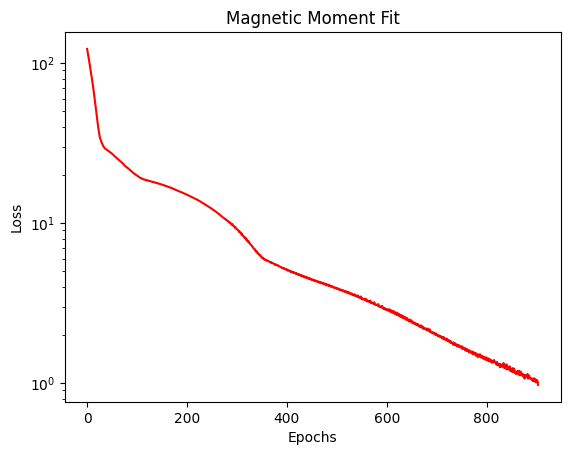

In [6]:
import matplotlib.pyplot as plt

y_axis = model.loss_history
x_axis = [*range(0, len(y_axis), 1)]

plt.plot(x_axis, y_axis, 'r-')
plt.yscale("log")
#plt.xscale("log")
plt.title('Magnetic Moment Fit')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [7]:
model.moment()

---- Moment  0 -----
Position:  [[-0.01121141 -0.02082659  0.1574059 ]]
Value:     [[0.08698419 0.14722998 2.7084312 ]]
---- Moment  1 -----
Position:  [[ 0.50261384 -0.0097789  -0.00832828]]
Value:     [[0.95865226 0.05638097 0.04632022]]
---- Moment  2 -----
Position:  [[-0.00112441  0.27038375 -0.01695436]]
Value:     [[-0.03968292  1.759566    0.24908042]]
